### 1. Import the libraries needed in the model to be run 

In [3]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
import csv
import h5py
import pandas as pd

### 2. Loading earthquake datasets from 2022 to 2023

In [15]:
df = pd.read_csv('gempa22_23.csv')
df

,tgl,ot,lat,lon,depth,mag,remark,strike1,dip1,rake1,strike2,dip2,rake2
0,2022-01-01,23:50:06.226,-8.13,122.38,10,2.9,Flores Region - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-01,23:48:17.777,-8.85,124.11,76,3.4,Timor Region,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-01-01,22:30:50.962,-3.59,140.21,12,3.8,Irian Jaya - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-01-01,22:15:37.661,-8.03,122.35,10,3.5,Flores Region - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-01-01,22:14:01.632,-8.04,122.39,10,3.0,Flores Region - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12020,2023-01-26,02:25:09.288,3.24,127.18,10,4.0,Talaud Islands - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
12021,2023-01-26,02:15:03.893,2.70,127.10,10,3.9,Northern Molucca Sea,NaN,NaN,NaN,NaN,NaN,NaN
12022,2023-01-26,01:57:08.885,-7.83,121.07,10,3.8,Flores Sea,NaN,NaN,NaN,NaN,NaN,NaN
12023,2023-01-26,01:46:21.009,3.00,127.16,10,4.1,Northern Molucca Sea,NaN,NaN,NaN,NaN,NaN,NaN


### 3. Drop data columns that are not used and have NaN values

In [16]:
df.drop(['strike1','dip1','rake1','strike2','dip2','rake2','ot','tgl'], axis=1, inplace=True)
df

,lat,lon,depth,mag,remark
0,-8.13,122.38,10,2.9,Flores Region - Indonesia
1,-8.85,124.11,76,3.4,Timor Region
2,-3.59,140.21,12,3.8,Irian Jaya - Indonesia
3,-8.03,122.35,10,3.5,Flores Region - Indonesia
4,-8.04,122.39,10,3.0,Flores Region - Indonesia
...,...,...,...,...,...
12020,3.24,127.18,10,4.0,Talaud Islands - Indonesia
12021,2.70,127.10,10,3.9,Northern Molucca Sea
12022,-7.83,121.07,10,3.8,Flores Sea
12023,3.00,127.16,10,4.1,Northern Molucca Sea


### 4. Rename the columns so that the dataset can be read clearly

In [17]:
col_names = ['Latitude', 'Longitude', 'Depth', 'Magnitude','Region']
df.columns = col_names
col_names

['Latitude', 'Longitude', 'Depth', 'Magnitude', 'Region']

### 5. Remove the symbols in the region column data. So that the cities listed are clear

In [18]:
# Menghilangkan spasi tambahan di sepanjang string pada kolom 'Region'
df['Region'] = df['Region'].str.strip()

In [19]:
# Menghilangkan tanda ; dari setiap string pada kolom 'Region'
df['Region'] = df['Region'].str.replace(';', '')
df.to_csv('data_gempa.csv', index=False)

### 6. Bring up a new dataset that has been pre-processing

In [20]:
tabel = df.loc[:,['Magnitude','Depth', 'Region']]
tabel

,Magnitude,Depth,Region
0,2.9,10,Flores Region - Indonesia
1,3.4,76,Timor Region
2,3.8,12,Irian Jaya - Indonesia
3,3.5,10,Flores Region - Indonesia
4,3.0,10,Flores Region - Indonesia
...,...,...,...
12020,4.0,10,Talaud Islands - Indonesia
12021,3.9,10,Northern Molucca Sea
12022,3.8,10,Flores Sea
12023,4.1,10,Northern Molucca Sea


### 7. Checking data that has NaN or null values

In [21]:
df.isna().sum()

Latitude     0
Longitude    0
Depth        0
Magnitude    0
Region       0
dtype: int64

### 8. Checking the data types present in the dataset

In [22]:
df.dtypes

Latitude     float64
Longitude    float64
Depth          int64
Magnitude    float64
Region        object
dtype: object

### 9. Creates a new DataFrame called table, which consists of the columns 'Region', 'Magnitude', and 'Depth' from the initial DataFrame (df).

In [23]:
tabel = df.loc[:,['Region','Magnitude', 'Depth']]
tabel

,Region,Magnitude,Depth
0,Flores Region - Indonesia,2.9,10
1,Timor Region,3.4,76
2,Irian Jaya - Indonesia,3.8,12
3,Flores Region - Indonesia,3.5,10
4,Flores Region - Indonesia,3.0,10
...,...,...,...
12020,Talaud Islands - Indonesia,4.0,10
12021,Northern Molucca Sea,3.9,10
12022,Flores Sea,3.8,10
12023,Northern Molucca Sea,4.1,10


### 10. Takes the values from the 'Magnitude' and 'Depth' columns in the DataFrame table and converts them to a NumPy array.

In [24]:
x = tabel[['Magnitude', 'Depth']].values
print(x)

[[ 2.9 10. ]
 [ 3.4 76. ]
 [ 3.8 12. ]
 ...
 [ 3.8 10. ]
 [ 4.1 10. ]
 [ 2.4 10. ]]


### 11. Determine the optimal number of clusters in a dataset using the "elbow method".

E:\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
E:\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
E:\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
E:\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super

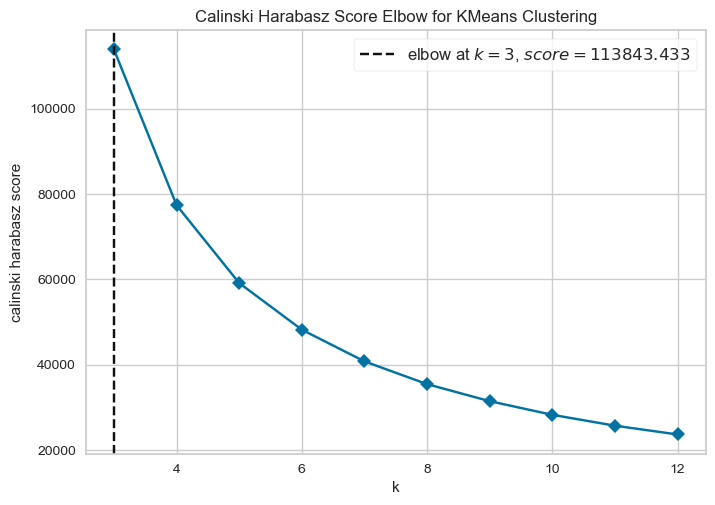

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [26]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Generate synthetic dataset with 8 random clusters
X, y = make_blobs(n_samples=12024, n_features=13, centers=3, random_state=42)

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(3,13), metric='calinski_harabasz', timings=False
)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

### 12. Visualization of the plot shape of the x data 

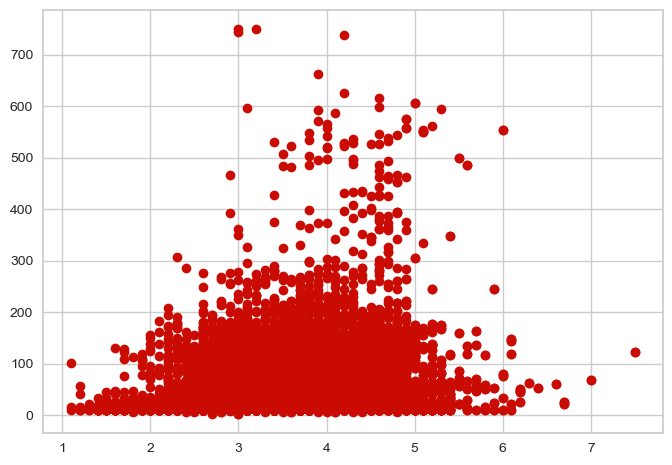

In [27]:
#melihat visualisasi data dari x
plt.plot(x[:,0],x[:,1],'ro')

### 13. Initializes the KMeans model with the specified number of clusters. In this case, the number of clusters is set to 3 (n_clusters=3).

In [28]:
#inisialisasi nilai cluster 3
kmeans = KMeans(n_clusters=3)

### 14. Train the KMeans model on data x with the fit method. After the KMeans model is trained, cluster centers will be generated and each data point will be assigned a cluster label based on the closest cluster.

In [29]:
#melakukan clustering dengan data x
kmeans.fit(x)

E:\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

### 15. Get cluster centers after the KMeans model is trained. After running kmeans.fit(x), the KMeans model will determine the cluster centers based on the cluster patterns found in the x data. These cluster centers are stored in the cluster variable using the cluster_centers_ attribute of the KMeans model object.

In [30]:
cluster = kmeans.cluster_centers_

In [31]:
#melihat pusat cluster 1-3
print(cluster)

[[  3.72839445 141.72447968]
 [  3.34957455  19.60777958]
 [  4.37111111 459.45925926]]


### 16. Used to predict cluster labels for each data point in a DataFrame (df) based on the KMeans clustering model. 

In [32]:
y_predicted = kmeans.fit_predict(df[['Magnitude', 'Depth']])
y_predicted

E:\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 0, 0, ..., 0, 0, 0])

### 17. The provided code is used for visualizing the results of KMeans clustering.

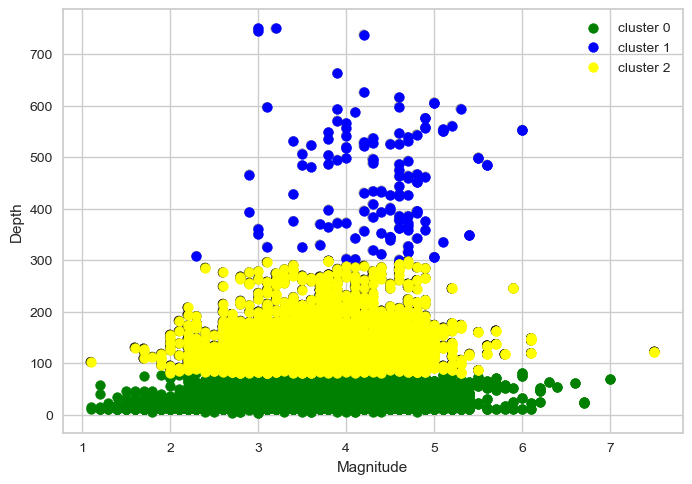

In [33]:
plt.scatter(x[:,0],x[:,1],c=kmeans.labels_,marker='o')
centroids = kmeans.cluster_centers_
labels = kmeans.labels_    
plt.scatter(x[labels ==0,0], x[labels == 0,1], s=50, color='green',label='cluster 0')
plt.scatter(x[labels ==1,0], x[labels == 1,1], s=50, color='blue',label='cluster 1')
plt.scatter(x[labels ==2,0], x[labels == 2,1], s=50, color='yellow',label='cluster 2')
plt.legend()
plt.xlabel('Magnitude')
plt.ylabel('Depth')
plt.show()

### 18. Used to add a new column, named 'Cluster', to a DataFrame (tabel) that contains the cluster labels assigned by a clustering algorithm (likely KMeans).

In [34]:
tabel['Cluster'] = labels
tabel['Cluster'].value_counts()

Cluster
0    9872
2    2018
1     135
Name: count, dtype: int64

In [35]:
tabel

,Region,Magnitude,Depth,Cluster
0,Flores Region - Indonesia,2.9,10,0
1,Timor Region,3.4,76,0
2,Irian Jaya - Indonesia,3.8,12,0
3,Flores Region - Indonesia,3.5,10,0
4,Flores Region - Indonesia,3.0,10,0
...,...,...,...,...
12020,Talaud Islands - Indonesia,4.0,10,0
12021,Northern Molucca Sea,3.9,10,0
12022,Flores Sea,3.8,10,0
12023,Northern Molucca Sea,4.1,10,0


### 19. Save model to h5 file

In [41]:
import joblib
import tensorflow as tf
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from keras.models import load_model

# Generate synthetic dataset with 8 random clusters
X, y = make_blobs(n_samples=12024, n_features=13, centers=3, random_state=42)

# Instantiate the clustering model
# Explicitly set n_init
kmeans = KMeans(n_clusters=3, n_init=10)


# Fit the data to the model
kmeans.fit(X)

# Save the model using joblib
joblib.dump(kmeans, 'kmeans_model.h5')

# Load the model
loaded_model = joblib.load('kmeans_model.h5')

# Now, you can use the loaded_model for predictions

### 20. The provided code is used to calculate the silhouette score for a clustering model (KMeans) applied to the data.

In [48]:
from sklearn.metrics import silhouette_score

# Fit the KMeans model on the data
kmeans.fit(x)

# Get cluster labels
labels = kmeans.labels_

# Calculate silhouette score
silhouette_avg = silhouette_score(x, labels)
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.8055821611201445


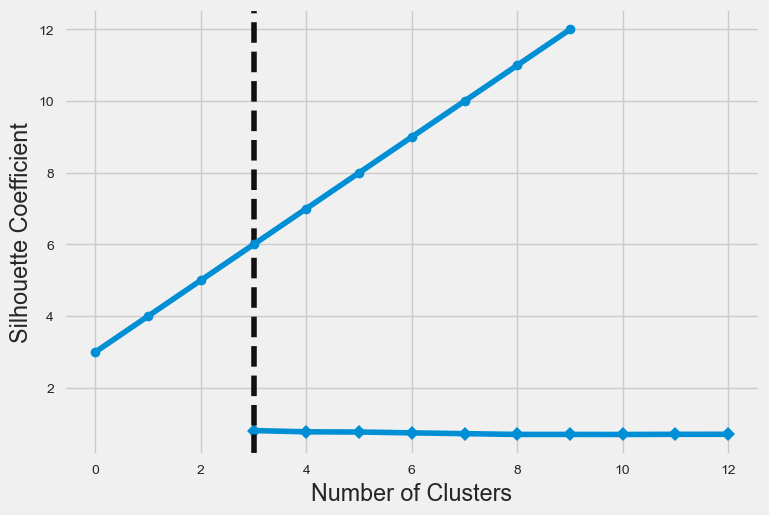

In [52]:
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt
import numpy as np

# Use the elbow method to find the optimal number of clusters
visualizer = KElbowVisualizer(
    kmeans, k=(3, 13), metric='silhouette', timings=False
)
visualizer.fit(x)

# Get silhouette scores
silhouette_coefficients = visualizer.k_values_

# Plot the silhouette scores
plt.style.use("fivethirtyeight")
plt.plot(silhouette_coefficients, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()
